<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nearest Neighbors
Nearest neighbor algorithms are among the simplest of all machine learning algorithms.
The idea is to memorize the training set and then predict the label of any new instnance on the basis of it's closest neighbor in training set.

It is a learning by by memorization type of rule, it requires the entire training dataset to be stored and at test time, We need to scan the entire dataset inorder to find the neighbor.

One thing to remember is the size of training set should increase exponentially as with the dimension, this is known as Curse of dimensionality.

### Assumptions:
data points that are similar, have similar labels, or things that look alike must be alike, or similar inputs have similar outputs.


## K-Nearest Neighbor: 
in thoery we would always like to predict qualitive response using the Bayes classifier. But for real data we do not the conditiional distribution of Y given X. 
Given a positive integer K and a test observation x_0, the KNN classifier first identifies the K points in training data that are closest to x_0, represented by Gaussian Distribution. 
it then estimates the conditional probability for class j as the fraction of points in Gaussian whose response value equal j.
Finally, KNN applies Bayes rule and classifies the test observation x_0 to the class with the largest probability.
K is usually to be chosen odd.

### Lets Make it simpler
data points that are similar, have similar labels, and K is the nearest neighbor to a data point.
if you are not the K nearest neighbor, then you should be further away than the K nearest neighbor.

KNN is only as good as the distant metric, if distant metric reflects simililarity then it is a perfect classifier, By distant metric we mean the distance between two data points

### Applications
#### Classification:
we can cast the prediction by majority of the labels for classification.
for a test input x assign the most common label amongs it's K most similar training inputs.

#### Regression:

For regression problems when y is continiuos value like prediction of a house based on the nearest neighbor houses, one can define the prediction to be the average target of the K nearest neighbors.


### Algorithm:
lets assign: 
* Sx = {K1,K2,K3,K4,...,KN},
* Sx in D, such that |Sx| = K
* for all points(x',y') which is in D but not in Sx
* dist(x,x') >= max dist(x,x") 

x is the data point, x' is the data which we measured distance from x, and x" is the next data point which we took its distance from x.   

Sx doentes the set of K nearest neighbors of data point x.
we can define that every point in D but not in Sx is atleast as far away from x as the furthest point in Sx.

* h(x) = mode({Y":(X",Y")} IN Sx).

the classifier h() is a function that returns the most common label in Sx.

#### Note:
mode returns the events with the highets occurance.


Nea

### Disadvantage:
as the data increases, the time to calaculate the distances also goes high, but accuracy also goes up

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [5]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2022-06-04 14:40:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.02s   

2022-06-04 14:40:08 (1.45 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



target classes
* 1- Basic Service
* 2- E-Service
* 3- Plus Service
* 4- Total Service

In [105]:
df = pd.read_csv("teleCust1000t.csv")
print("shape\t=",df.shape)
df.head()

shape	= (1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [107]:
feature = df[0:10]
feature

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


from shape of the the dataset we can conclude that there is 12 features, 11 independent and one dependent(custcat).
(1000,12), 1000 rows with 12 features.

Gender and marital are in two categories, (Male,Female),and the marital status(Single,Married)

### Lets check if there is an empty or other kind of data rather than float and integer

In [9]:
df.dtypes
# we do not have any undesirable object, all are either integers or floats

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [99]:
df.info()
# all rows are filled, no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB



## **The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns**

In [10]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


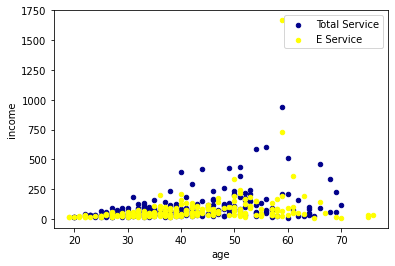

In [83]:
ax = df[df['custcat'] == 4][0:300].plot(kind='scatter', x='age', y='income', color='DarkBlue',label="Total Service");
df[df['custcat'] == 2][0:300].plot(kind='scatter',x='age', y='income', color='Yellow',ax = ax,label="E Service" );

plt.show()

### Lets look into three features and the dependent feature
* Age
* Income
* Region
* custcat

In [91]:
sdf = df[["income","age","region","custcat"]]
sdf.mean()

income     77.535
age        41.684
region      2.022
custcat     2.487
dtype: float64

<Figure size 1440x720 with 0 Axes>

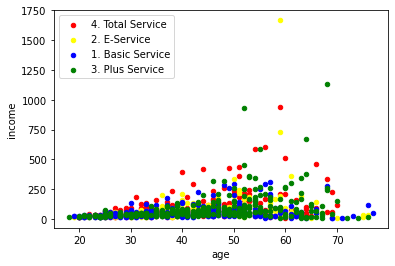

In [96]:

plt.figure(figsize=(20,10))
ax = sdf[sdf['custcat'] == 4][0:1000].plot(kind='scatter', x='age', y='income', color='red',label ="4. Total Service")
sdf[sdf['custcat'] == 2][0:1000].plot(kind='scatter',x='age', y='income', color='Yellow',ax = ax, label =  "2. E-Service");
sdf[sdf['custcat'] == 1][0:1000].plot(kind='scatter',x='age', y='income', color='blue',ax = ax,   label=   "1. Basic Service");
sdf[sdf['custcat'] == 3][0:1000].plot(kind='scatter',x='age', y='income', color='green',ax = ax,  label=   "3. Plus Service");

plt.show()

From the above plot we can see that most of the customers are belongs to the third group which is "Plus Service" and few people which their incomes are high are in 4th category, that is the "Total Service" group.

another observation is most of our customer incomes are in the range of $(0-250).

we have few outliers too.

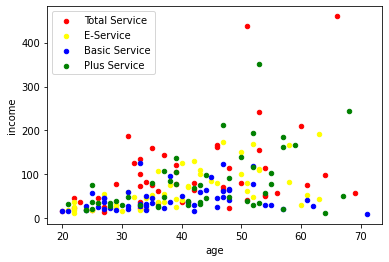

In [93]:
ax = sdf[sdf['custcat'] == 4][0:50].plot(kind='scatter', x='age', y='income', color='red',label ="Total Service")
sdf[sdf['custcat'] == 2][0:50].plot(kind='scatter',x='age', y='income', color='Yellow',ax = ax, label =  "E-Service");
sdf[sdf['custcat'] == 1][0:50].plot(kind='scatter',x='age', y='income', color='blue',ax = ax,   label=   "Basic Service");
sdf[sdf['custcat'] == 3][0:50].plot(kind='scatter',x='age', y='income', color='green',ax = ax,  label=   "Plus Service");

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02e1f38dd0>,
      dtype=object)

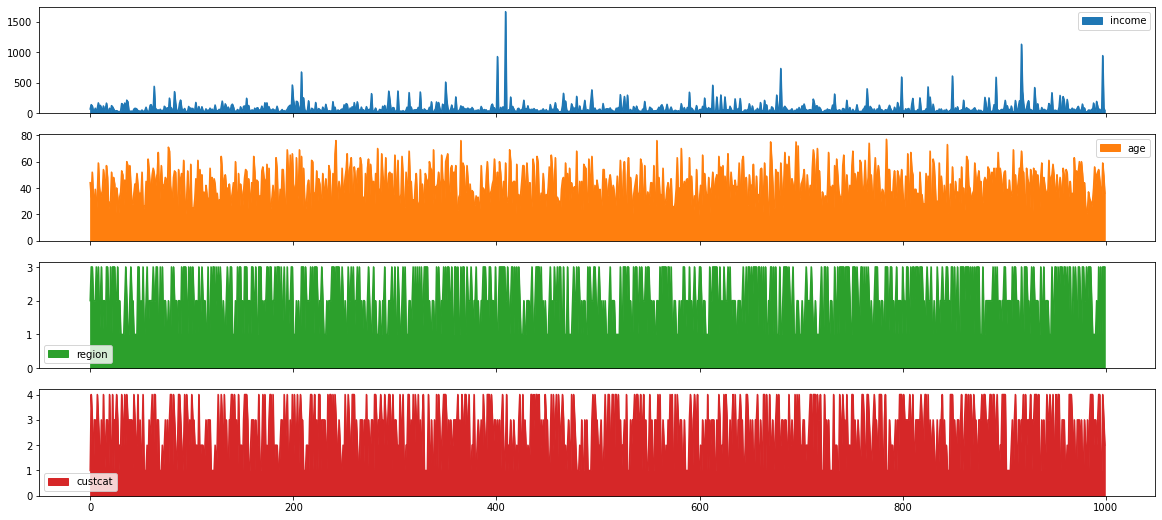

In [85]:
sdf.plot.area(figsize=(20, 9), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02e1ceabd0>,
      dtype=object)

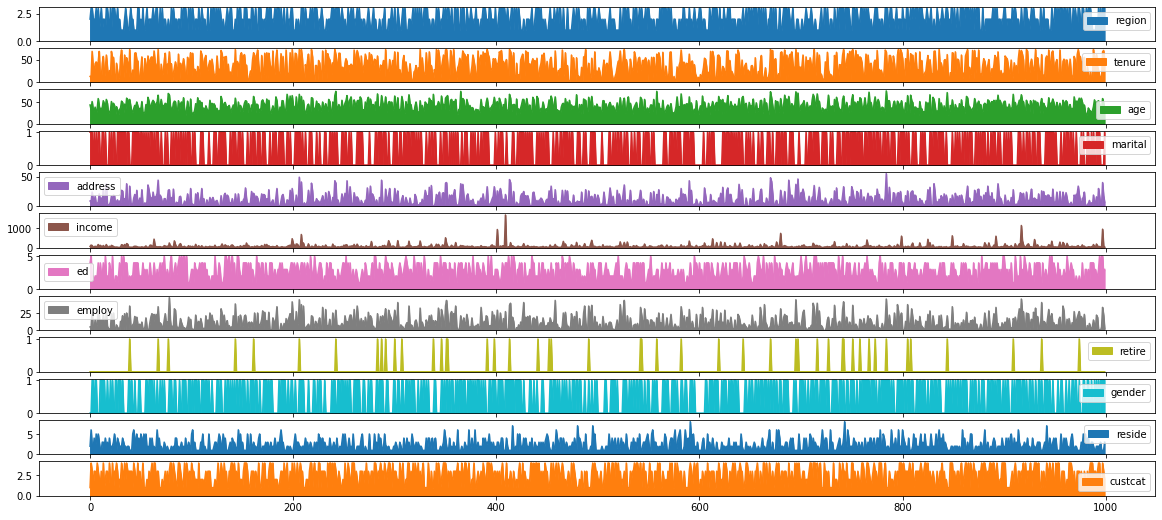

In [80]:
df.plot.area(figsize=(20, 9), subplots=True)

income        AxesSubplot(0.125,0.125;0.168478x0.755)
age        AxesSubplot(0.327174,0.125;0.168478x0.755)
region     AxesSubplot(0.529348,0.125;0.168478x0.755)
custcat    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

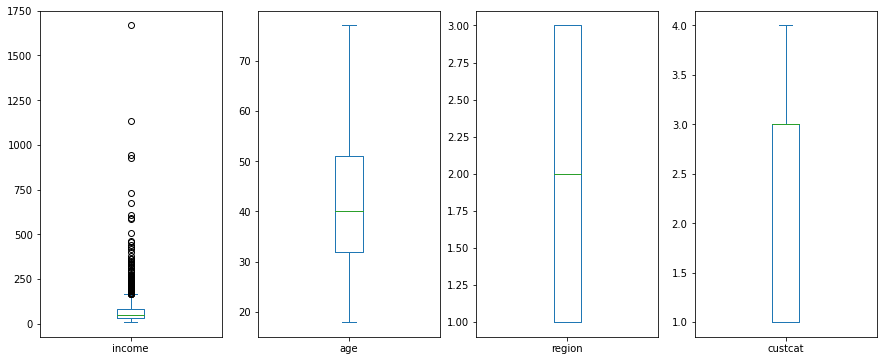

In [84]:
sdf.plot.box(figsize=(15, 6), subplots=True)

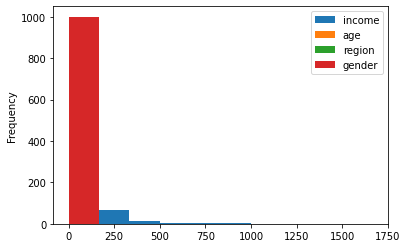

In [113]:
new_f = df[["income","age","region","gender"]]
new_f.plot.hist()


Histogram plot gives the frequency of a feature or how much a value repeated in a grpah, for gender as we have two categories only, 0 or 1, that's why theri frequency is too high

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02e1cdce50>]],
      dtype=object)

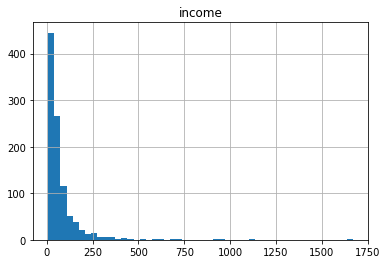

In [115]:
new_f.hist(column='income', bins=50)

# Preparing the data

In [116]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

# Independent Feature Values

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array


In [128]:

X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:10]       

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

## Dependent Feature (Target)

In [126]:
y = sdf["custcat"].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

### Checking for mean and standard deviation of our data.
* Standard deviation is a number that describes how spread out the values are ,A low standard deviation means that most of the numbers are close to the mean (average) value.
* Mean - The average value


In [129]:
print("Mean of X\t=",X.mean())
print("Standard deviation\t",X.std())


Mean of X	= 16.851454545454544
Standard deviation	 40.92925967916226


# Normalize the Data

As have seen from above plots and the tables, the value for some of our parameters are higher and for others, lower;
Because the KNN calssifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale or value of variables matters.
any variable that has large value will have a much larger effect on distance and hence on the KNN, calssifier than variable that are in small scale or have low quantity. for example, in this data, the income and the age, they have big difference and if we consider these two, then the model will classify more based on income rather than age.

A good way to handle this issue is to standardize the data so that all variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale.

in numpy we have built in library to do this for us."No worries"

source:📙"an introduction to statistical learning with applications R"

In [130]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print("Mean of X\t=",X.mean())
print("Standard deviation\t",X.std())



Mean of X	= 3.132847516760442e-17
Standard deviation	 1.0


# Train Test Split


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (750, 11) (750,)
Test set: (250, 11) (250,)


# **K-Nearest Neighbor**.

Now, it is time to wrap up everything and go for the Classification.
the KNN classifier produce the class of a given test observation by identifying the observations that are nearest to it.
we have discussed about the theory behind the **KNN** in the begining, one thing to note is:
* How much should be the value of **K** ?.

the choice of **K** has drastic effect in the KNN classifier obtained. 
for less K we have a more felxible model and it can capture the noise(Overfit in training data),the property which we don't want and it cannot be trusted to predict the test data based on this model, But as K increases the decision boundry becomes more linear, which results in low-variance and high-bias classifier.

For example if we have three blue balls inside a box, now we have an unknown ball there, as we have chosen K = 3 (3 Neighbors), based on majority vote, that unkown ball also would be classified as blue ball.
This is how KNN works

TO answer the above Quesion one solution can be to pick the **K** and on that **K** , calculate the accuracy of the test and repeat the process for different values of **K** untill you get the best accuracy on the test dataset.



## Importing the KNN library

In [136]:
from sklearn.neighbors import KNeighborsClassifier

## Training. 
### **K = 5**

In [141]:
k = 5
#Train Model and Predict  
neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbors

KNeighborsClassifier()

## Prediction
Now, Lets predict the labels on unseen data(test data)

In [145]:
Y_predicted = neighbors.predict(X_test)
Y_predicted[0:10]

array([2, 1, 3, 3, 1, 3, 1, 3, 4, 1])

## Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

 source: "IBM,coursera"

In [148]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbors.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Y_predicted))

Train set Accuracy:  0.5466666666666666
Test set Accuracy:  0.308


## Lets Check which K is the best by ploting the test accuracy

In [154]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predicted=neighbors.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predicted)


    std_acc[n-1]=np.std(y_predicted==y_test)/np.sqrt(y_predicted.shape[0])

mean_acc

array([0.244, 0.252, 0.292, 0.308, 0.308, 0.3  , 0.308, 0.312, 0.312,
       0.32 , 0.308, 0.296, 0.292, 0.288, 0.308, 0.336, 0.308, 0.364,
       0.372, 0.348, 0.356, 0.356, 0.356, 0.344, 0.332, 0.336, 0.316,
       0.32 , 0.32 ])

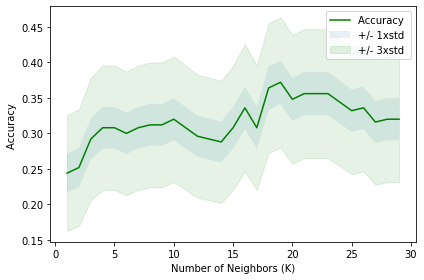

In [155]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [156]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.372 with k= 19


## Try again.
**Lets chose K = 19**

**K = 19** means that the optimal number of **Neighbors** to choose for predicting the unknown data would be 19. 

so we are taking the majority votes from 19 **Neighbors** and based on that we specify to which category it should belongs to. 

## Try again.
**Lets chose K = 19**

In [157]:
k = 5
#Train Model and Predict  
neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbors
Y_predicted = neighbors.predict(X_test)
Y_predicted[0:10]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbors.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Y_predicted))


Train set Accuracy:  0.5466666666666666
Test set Accuracy:  0.308
